#**DEEP LEARNING Modeling**

###**CNN**

In [1]:
# Importing necessary libraries

import warnings
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd "/content/drive/My Drive/Design Project"

/content/drive/My Drive/Design Project


In [4]:
train_data = pd.read_csv('preprocessed_train_data.csv')
test_data = pd.read_csv('preprocessed_test_data.csv')
valid_data = pd.read_csv('preprocessed_valid_data.csv')

In [5]:
# Selecting the features and target variables
X = train_data["text_preprocessed"]
y = train_data["propaganda_label"]

In [6]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

In [7]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
Xcnn_train = tokenizer.texts_to_sequences(X_train)
Xcnn_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1

In [8]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 500
Xcnn_train = pad_sequences(Xcnn_train, padding='post', maxlen=maxlen)
Xcnn_test = pad_sequences(Xcnn_test, padding='post', maxlen=maxlen)
print(Xcnn_train[0, :])

[  55 4420  269   83   24 1695  814 1330 4693  303 2817  522  508 2285
   22   70  382  841 1287   96  901 2866  377  107   66  522 2285  213
  717   49  610  240    9   28    1 2285   44  717  302  581   14  352
  229   24    1   70 1147  377   96  206  463 1388  151 1083 3253  351
 3234 2450 1284  582  522  318   24  600   25  470  809   24 2030  607
   15  737  494   96  213  522  503  522   15   71 1156  235    1   15
  737 3489   15  481  149  526   24    1  263 2697  362 1941  328 1105
 1723 3983  328  491  362 1105 1585 1377 2044  322 1941   92  323 2145
 2297  268  370  822 1105  631  171  631 1377  328  491  252  222 1614
  415 2427 2277  463    5 2529   33  317    3    5   98  408  515 1632
 2662  684  463    5 2285  463    5  567 1058   96  542 1147   35  140
  250 1112 1111 2986 2205  369  206   55  537   24   37 2216   71   10
    1  345  886   96  318   24  600    1   96  190  240    9  283  397
   68   15   24  141   95    9  667 4301  396  117  522 2766 2274  773
   24 

In [9]:
train_labels = np.array(y_train)
test_labels = np.array(y_test)

In [10]:
# Recode class labels from 1 and -1 to 0 and 1

train_labels[train_labels == -1] = 0
test_labels[test_labels == -1] = 0

In [11]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.metrics import AUC
from keras.optimizers import RMSprop

# Building the model
embedding_dim = 200
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
textcnnmodel.add(layers.Conv1D(128, 5, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Dense(10, activation='relu'))
textcnnmodel.add(layers.Dense(1, activation='sigmoid'))
textcnnmodel.compile(optimizer = RMSprop(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy',AUC()])
textcnnmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 200)          33997800  
                                                                 
 conv1d (Conv1D)             (None, 496, 128)          128128    
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 34127229 (130.19 MB)
Trainable params: 34127229 (130.19 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [12]:
%%time

textcnnmodel.fit(Xcnn_train, train_labels,
                     epochs=5,
                     validation_data=(Xcnn_test, test_labels),
                     batch_size=10)

Epoch 1/5
2879/2879 [==============================] - 1134s 393ms/step - loss: 0.1822 - accuracy: 0.9355 - auc: 0.9193 - val_loss: 0.1768 - val_accuracy: 0.9419 - val_auc: 0.9443
Epoch 2/5
2879/2879 [==============================] - 1122s 390ms/step - loss: 0.1177 - accuracy: 0.9589 - auc: 0.9657 - val_loss: 0.1827 - val_accuracy: 0.9440 - val_auc: 0.9349
Epoch 3/5
2879/2879 [==============================] - 1138s 395ms/step - loss: 0.0814 - accuracy: 0.9733 - auc: 0.9817 - val_loss: 0.2072 - val_accuracy: 0.9285 - val_auc: 0.9475
Epoch 4/5
2879/2879 [==============================] - 1149s 399ms/step - loss: 0.0413 - accuracy: 0.9870 - auc: 0.9933 - val_loss: 0.2015 - val_accuracy: 0.9418 - val_auc: 0.9370
Epoch 5/5
2879/2879 [==============================] - 1133s 393ms/step - loss: 0.0139 - accuracy: 0.9962 - auc: 0.9976 - val_loss: 0.3095 - val_accuracy: 0.9464 - val_auc: 0.8863
CPU times: user 1h 11min 58s, sys: 59min 36s, total: 2h 11min 35s
Wall time: 1h 34min 35s


In [13]:
# Saving the model to an HDF5 file

textcnnmodel.save("cnn_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
from tensorflow.keras.models import load_model

# Load the saved model
textcnnmodel = load_model("cnn_model.h5")

<ipython-input-15-69fdab68e9ea>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


225/225 [==============================] - 22s 100ms/step
Confusion Matrix:
[[6324   70]
 [ 316  488]]


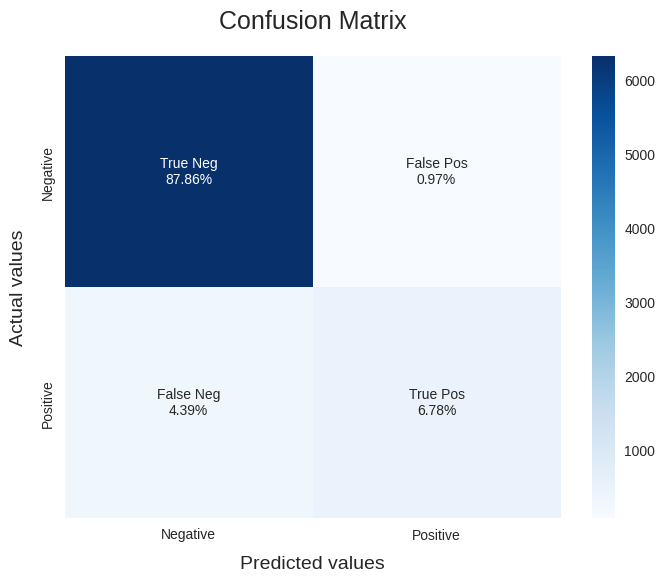

Classification Report:
               precision    recall  f1-score   support

          -1       0.95      0.99      0.97      6394
           1       0.87      0.61      0.72       804

    accuracy                           0.95      7198
   macro avg       0.91      0.80      0.84      7198
weighted avg       0.94      0.95      0.94      7198

ROC AUC Score: 0.9361853152131119


<ipython-input-15-69fdab68e9ea>:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--' , color='blue')


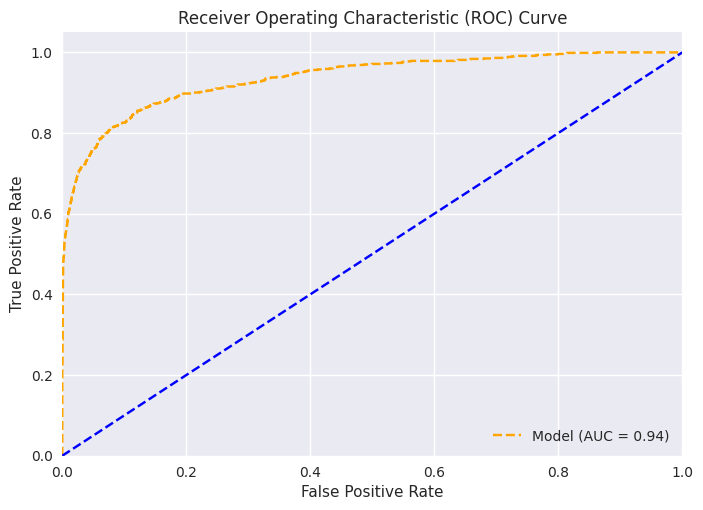

In [15]:
# Make predictions on the training data using the model

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')


predictions = textcnnmodel.predict(Xcnn_test)
predicted_labels = np.round(predictions)

# Recode class labels from 1 and 0 to -1 and 1
test_labels[test_labels == 0] = -1
predicted_labels[predicted_labels == 0] = -1

# Generate the confusion matrix
confusion_mat = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)


# Computing and plotting the Confusion matrix
cf_matrix = confusion_matrix(test_labels, predicted_labels)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

plt.figure(figsize=(8, 6)) # Create a new figure for confusion matrix
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()


# Generate the classification report
class_report = classification_report(test_labels, predicted_labels)
print("Classification Report:\n", class_report)

# Calculate and print the ROC AUC score
auc_score = roc_auc_score(test_labels, predictions)
print("ROC AUC Score:", auc_score)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
sns.set_style("darkgrid")
plt.figure()
plt.plot(fpr, tpr, linestyle='--',color='orange',label=f'Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--' , color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<ipython-input-16-a24fec1b36b2>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


161/161 [==============================] - 13s 81ms/step
Confusion Matrix:
[[4495   55]
 [ 171  404]]


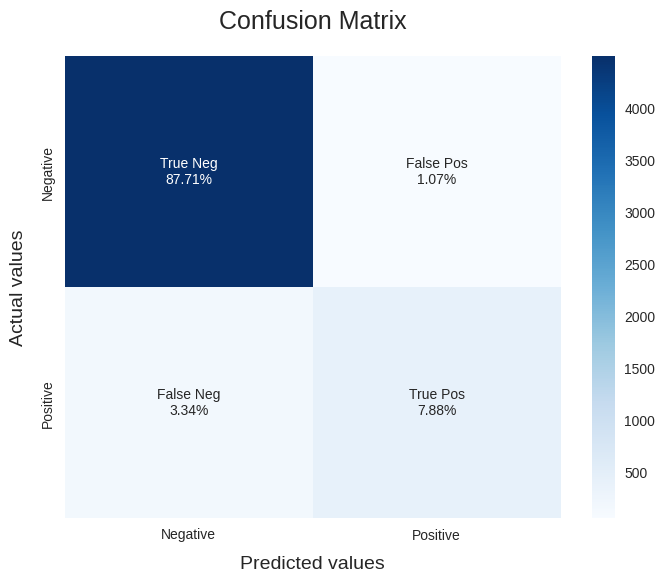

Classification Report:
               precision    recall  f1-score   support

          -1       0.96      0.99      0.98      4550
           1       0.88      0.70      0.78       575

    accuracy                           0.96      5125
   macro avg       0.92      0.85      0.88      5125
weighted avg       0.95      0.96      0.95      5125

ROC AUC Score: 0.9502547539417106


<ipython-input-16-a24fec1b36b2>:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--' , color='blue')


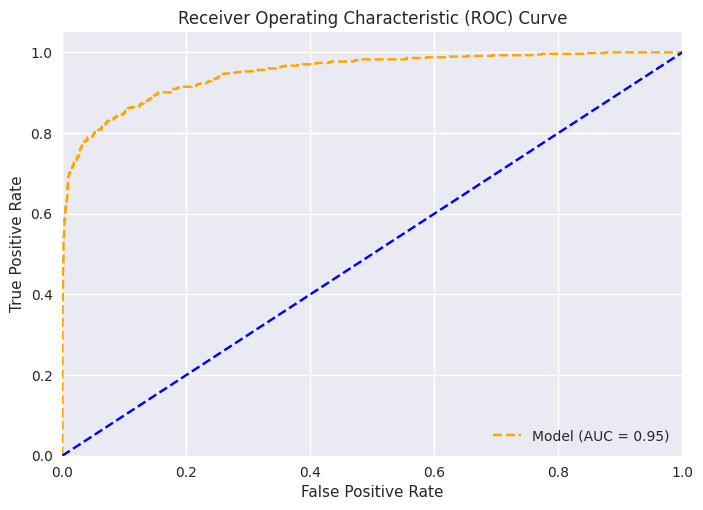

In [16]:
# Make predictions on the Validation data using the model

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
plt.style.use('seaborn')

test_sequences = tokenizer.texts_to_sequences(valid_data.text_preprocessed)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=maxlen)


predictions = textcnnmodel.predict(test_padded)
predicted_labels = np.round(predictions)

# Changing the label name
y_test = valid_data.propaganda_label
test_labels = np.array(y_test)

# Recode class labels from 1 and 0 to -1 and 1
test_labels[test_labels == 0] = -1
predicted_labels[predicted_labels == 0] = -1

# Generate the confusion matrix
confusion_mat = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)


# Computing and plotting the Confusion matrix
cf_matrix = confusion_matrix(test_labels, predicted_labels)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

plt.figure(figsize=(8, 6)) # Create a new figure for confusion matrix
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()


# Generate the classification report
class_report = classification_report(test_labels, predicted_labels)
print("Classification Report:\n", class_report)

# Calculate and print the ROC AUC score
auc_score = roc_auc_score(test_labels, predictions)
print("ROC AUC Score:", auc_score)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
sns.set_style("darkgrid")
plt.figure()
plt.plot(fpr, tpr, linestyle='--',color='orange',label=f'Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--' , color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<ipython-input-17-210d30dbfd20>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


318/318 [==============================] - 26s 81ms/step
Confusion Matrix:
[[8911  108]
 [ 393  747]]


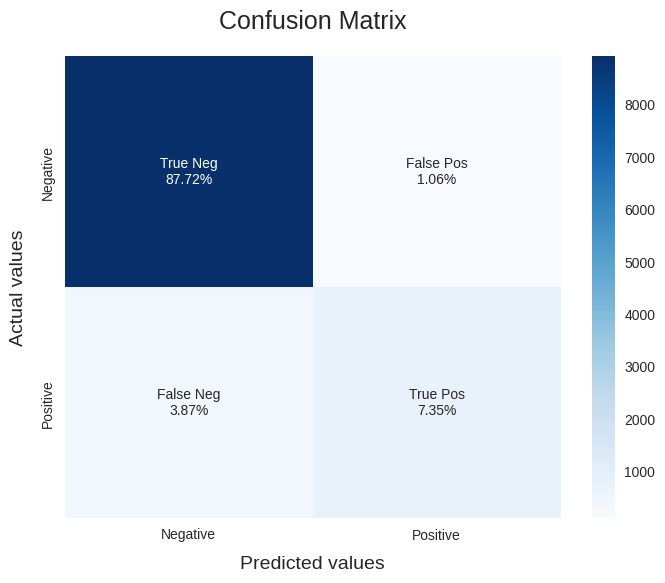

Classification Report:
               precision    recall  f1-score   support

          -1       0.96      0.99      0.97      9019
           1       0.87      0.66      0.75      1140

    accuracy                           0.95     10159
   macro avg       0.92      0.82      0.86     10159
weighted avg       0.95      0.95      0.95     10159

ROC AUC Score: 0.94309187426933


<ipython-input-17-210d30dbfd20>:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--' , color='blue')


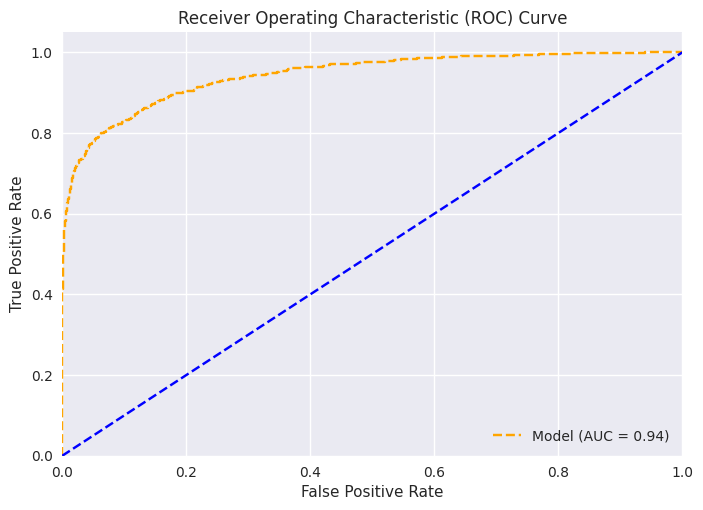

In [17]:
# Make predictions on the Test data using the model

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
plt.style.use('seaborn')


test_sequences = tokenizer.texts_to_sequences(test_data.text_preprocessed)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=maxlen)

predictions = textcnnmodel.predict(test_padded)
predicted_labels = np.round(predictions)

# Changing the label name
y_test = test_data.propaganda_label
test_labels = np.array(y_test)

# Recode class labels from 1 and 0 to -1 and 1
test_labels[test_labels == 0] = -1
predicted_labels[predicted_labels == 0] = -1

# Generate the confusion matrix
confusion_mat = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)


# Computing and plotting the Confusion matrix
cf_matrix = confusion_matrix(test_labels, predicted_labels)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

plt.figure(figsize=(8, 6)) # Create a new figure for confusion matrix
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()


# Generate the classification report
class_report = classification_report(test_labels, predicted_labels)
print("Classification Report:\n", class_report)

# Calculate and print the ROC AUC score
auc_score = roc_auc_score(test_labels, predictions)
print("ROC AUC Score:", auc_score)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
sns.set_style("darkgrid")
plt.figure()
plt.plot(fpr, tpr, linestyle='--',color='orange',label=f'Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--' , color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [18]:
# Using Prettytable for displaying the observations

from prettytable import PrettyTable

table = PrettyTable()

table.field_names = ["S.No", "Model", "Hyper Parameters", "Accuracy", "F1 - Negative Class(-1)", "F1 - Positive Class(1)", "AUC Score"]

print(table)

+------+-------+------------------+----------+-------------------------+------------------------+-----------+
| S.No | Model | Hyper Parameters | Accuracy | F1 - Negative Class(-1) | F1 - Positive Class(1) | AUC Score |
+------+-------+------------------+----------+-------------------------+------------------------+-----------+
+------+-------+------------------+----------+-------------------------+------------------------+-----------+


In [19]:
## Adding rows to the table

table.add_row(["1","Convolutional Neural Networks", "Embedding Dim: 200, Conv1D: 128 filters, Optimizer: RMSprop, Loss: Binary cross-entropy", "0.95", "0.97", "0.76","0.94"])

In [20]:
print(table)

+------+-------------------------------+-----------------------------------------------------------------------------------------+----------+-------------------------+------------------------+-----------+
| S.No |             Model             |                                     Hyper Parameters                                    | Accuracy | F1 - Negative Class(-1) | F1 - Positive Class(1) | AUC Score |
+------+-------------------------------+-----------------------------------------------------------------------------------------+----------+-------------------------+------------------------+-----------+
|  1   | Convolutional Neural Networks | Embedding Dim: 200, Conv1D: 128 filters, Optimizer: RMSprop, Loss: Binary cross-entropy |   0.95   |           0.97          |          0.76          |    0.94   |
+------+-------------------------------+-----------------------------------------------------------------------------------------+----------+-------------------------+-------------